In [2]:
import pandas as pd
import numpy.matlib as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from process.cp_image_data import cp_image_data
from process.compile_object_data import compile_object_data
import pathlib

import matplotlib.pyplot as plt

from process.cp_image_data import cp_image_data
from process.compile_object_data import compile_object_data

/home/ubuntu/miniconda3/envs/cell-imaging-2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
exp_path = pathlib.Path('/fsx/processed-data')
exps = np.array([x.name for x in exp_path.iterdir() if x.is_dir()])
drop_columns = pd.read_csv('/fsx/processed-data/220811 96w 9 Gene KO /2022-08-22_soma_objects/2022-08-30_soma_objects_image_column_drop_list.csv', header=None, dtype=str)

In [4]:
analysis_name = '2022-10-17_soma_objects_CellVis'
exp_name = '220929 CellVis Plastic 20x SD MIP TIFs'

pm = pd.read_csv(exp_path / exp_name / 'platemap.csv')
data_path = exp_path / exp_name / analysis_name /  (analysis_name + '_soma.csv')
embedded_data = compile_object_data(data_path, pm, drop_columns)


/home/ubuntu/cell-imaging/process/compile_object_data.py:31: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.loc[i] = soma_data.loc[i].mean(axis=0)
/home/ubuntu/cell-imaging/process/compile_object_data.py:57: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data - data.mean(axis=0)
/home/ubuntu/miniconda3/envs/cell-imaging-2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better 

In [5]:
# data = pd.read_csv('/fsx/processed-data/220929 Mattek 20x SD MIP TIFs/2022-10-11_soma_objects/2022-10-11_soma_objects_Image.csv')
data = pd.read_csv('/fsx/processed-data/220929 CellVis Plastic 20x SD MIP TIFs/2022-10-17_soma_objects_CellVis/2022-10-17_soma_objects_CellVis_Image.csv')
data.index = pm['filename']

In [ ]:
data.columns.tolist()

In [ ]:
data['FileName_TMRM'][13][21:23]

In [61]:
fname[11:13]

'02'

In [16]:
measurement = 'Median_soma_Intensity_MeanIntensity_CellROX'
# measurement = 'Count_soma'
row_lookup = dict(zip('ABCDEFGH', [0, 1, 2, 3, 4, 5, 6, 7]))
plate = np.zeros((8,12))
for fname in data.index:
    row = row_lookup[fname[10]]
    row = row_lookup[fname[10]]
    col = int(fname[11:13]) - 1
    plate[row, col] = data.loc[fname][measurement]
# plate = plate - plate[:,10:].mean()
# baseline = plate[:,9]
# baseline.shape = [baseline.shape[0], 1]
# plate = plate / baseline
# plate = np.delete(plate, [10, 11], axis=1)

Text(0.5, 1.0, '220929 CellVis Plastic 20x SD MIP TIFs\nMedian_soma_Intensity_MeanIntensity_CellROX')

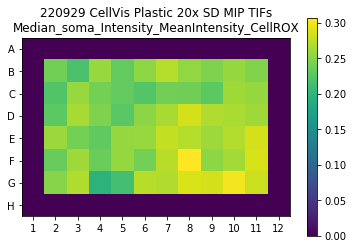

In [17]:
fig = plt.figure()
plt.imshow(plate)
plt.yticks(list(row_lookup.values()), list(row_lookup.keys()))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], [1,2,3,4,5,6,7,8,9,10,11,12])
plt.colorbar()
plt.title(exp_name +'\n' + measurement)
# fig.savefig('/fsx/processed-data/exp_name/2022-10-17_plate_heatmap.png')
# plate.to_csv('/fsx/processed-data/exp_name/2022-10-17_plate_heatmap.csv')

In [ ]:
exp_name

In [ ]:
morphology_file = 'FileName_TMRM'

# Load processed cellprofiler soma data from csv
soma_data = pd.read_csv(data_path)
soma_data.index = soma_data['ImageNumber']
path_parts = list(data_path.parts)
path_parts[-1] = path_parts[-1].replace('_soma.csv', '_Image.csv')
data_path = pathlib.Path(*path_parts)
image_data = pd.read_csv(data_path)
image_data.index = image_data['ImageNumber']

# Convert from per-soma measuremnt to per-image measurements
data = pd.DataFrame(data = 0, index=image_data.index, columns=soma_data.columns)
# print(image_data.index) 
for i in image_data.index:
    data.loc[i] = soma_data.loc[i].mean(axis=0)

# Set index to well name
data.index = image_data[morphology_file]

# Remove unwanted columns
drop_columns = np.array(drop_columns).astype(str).flatten()
for col in drop_columns:
    data = data.drop(data.columns[data.columns.str.contains(col)], axis=1)
# print(data.head())
# print(pm.head())
# Reindex data by platemap filenames to make sure row order is correct
pm.index = pm['filename']
data = data.reindex(pm.index)

# Set conditions to index
data.index = pm['condition']
pm.index = pm['condition']
# Also add as column to data (for stats model)
data['condition'] = data.index

# Remove 'no_dye' condition
if 'no_dye' in data.index:
    data = data.drop('no_dye', axis=0)
    pm = pm.drop('no_dye', axis=0)

In [ ]:
data[measurement]

In [ ]:
soma_data.loc[i]